# Chapter 5: Modeling distributions
---

## 5.1 - The exponential distribution

In [1]:
import nsfg
import thinkstats2
import thinkplot
import analytic
import numpy as np

In [2]:
df = analytic.ReadBabyBoom()
df.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [3]:
diffs = df.minutes.diff()
diffs.head()

0     NaN
1    59.0
2    14.0
3    37.0
4    62.0
Name: minutes, dtype: float64

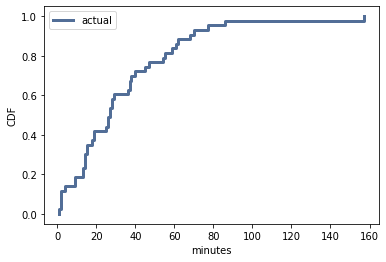

<Figure size 576x432 with 0 Axes>

In [4]:
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF')

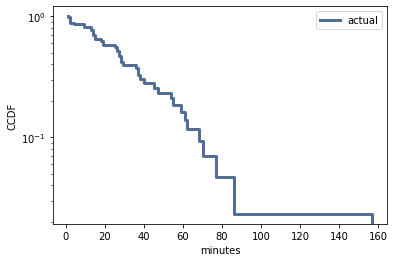

<Figure size 576x432 with 0 Axes>

In [5]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='minutes', ylabel='CCDF', yscale='log')

## 5.2 - The normal distribution

In [6]:
import scipy.stats

In [7]:
scipy.stats.norm.cdf(0)

0.5

## 5.3 - Normal probability plot

In [8]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

weights = live.totalwgt_lb
weights.head

<bound method NDFrame.head of 0        8.8125
1        7.8750
2        9.1250
3        7.0000
4        6.1875
          ...  
13581    6.3750
13584    6.3750
13588    6.1875
13591    7.5000
13592    7.5000
Name: totalwgt_lb, Length: 9148, dtype: float64>

In [9]:
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='birth weights')

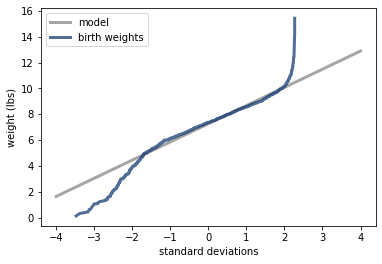

<Figure size 576x432 with 0 Axes>

In [10]:
MakeNormalPlot(weights)

thinkplot.Show(legend=True, xlabel='standard deviations', ylabel='weight (lbs)')

## 5.6 - Generating random numbers

In [11]:
def expovariate(lam):
    p = np.random.random()
    x = -np.log(1 - p) / lam
    
    return x

In [12]:
for _ in range(10):
    print(expovariate(2))

0.931491089115232
0.2099016009282916
0.8786051848582984
0.17705583331526298
0.2581221718820473
0.4819673785845093
0.20502873243940262
0.3546428021618384
0.04421429960635078
0.6286292888696992


---
## 5.8 - Exercises
---

### Exercise 5.1

In [15]:
# USA male heights in units of cm
mu = 178
sig = 7.7

min_height = 177.80
max_height = 185.42

In [20]:
percentages = scipy.stats.norm.cdf([min_height, max_height], loc=mu, scale=sig)

print("Percentage of US men at or below 5'10\": ", percentages[0])
print("Percentage of US men at or above 6'1\": ", percentages[1])
print("Percentage of US men whose heights qualify for Blue Man Group: ", percentages[1] - percentages[0])

Percentage of US men at or below 5'10":  0.48963902786483265
Percentage of US men at or above 6'1":  0.8323858654963063
Percentage of US men whose heights qualify for Blue Man Group:  0.3427468376314737


### Exercise 5.2

In [34]:
import matplotlib.pyplot as plt

In [23]:
# Human heights in units of m
x_min = 1
alpha = 1.7

In [30]:
median = 2**(1/alpha)

print("Minimum human height:  {} m".format(x_min))
print("Median human height  {} m".format(round(median, 2)))

Minimum human height:  1 m
Median human height  1.5 m


In [62]:
x = np.linspace(x_min, 3, 1000)
y = 1 - (x / x_min)**(-alpha)

(1, 3)

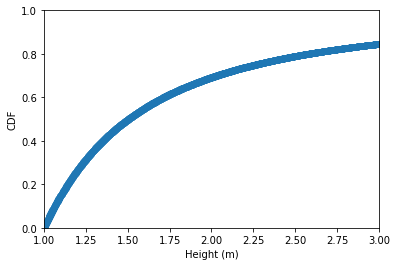

In [66]:
plt.scatter(x, y)
plt.xlabel('Height (m)')
plt.ylabel('CDF')
plt.ylim([0, 1])
plt.xlim([1, 3])

In [69]:
# For alpha > 1
mean = (alpha * x_min) / (alpha - 1)

print("Mean human height according to Pareto distribution:  {} m".format(round(mean, 2)))

Mean human height according to Pareto distribution:  2.43 m


In [71]:
below_mean = 100 * (1 - (mean / x_min)**(-alpha))

print("Percentage of humans below the mean height:  {}%".format(round(below_mean, 2)))

Percentage of humans below the mean height:  77.87%


In [83]:
super_tall = (1000 / x_min)**(-alpha) * 7000000000

print("Number of people out of 7 billion who are taller than 1 km:  {}".format(int(super_tall)))
print("The tallest person could ostensibly be infinity meters tall!  (^_^)")

Number of people out of 7 billion who are taller than 1 km:  55602
The tallest person could ostensibly be infinity meters tall!  (^_^)


### Exercise 5.3

In [87]:
lam = 2
k = 1

sample = [thinkstats2.random.weibullvariate(lam, k) for _ in range(1000)]

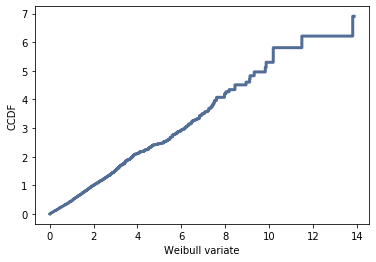

<Figure size 576x432 with 0 Axes>

In [90]:
ccdf = thinkstats2.Cdf(sample)

thinkplot.Cdf(ccdf, transform='weibull')
thinkplot.Show(xlabel='Weibull variate', ylabel='CCDF')

### Exercise 5.4

In [128]:
mean = 32.7
lam = 1 / mean

sample_x = np.array([thinkstats2.random.expovariate(lam) for _ in range(44)])
model_x = np.linspace(0, 250, 1000)

sample_cdf = 1 - np.exp(-lam * sample_x)
model_cdf = 1 - np.exp(-lam * model_x)

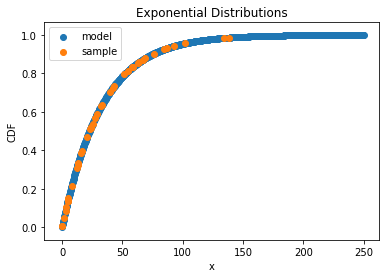

In [132]:
plt.scatter(model_x, model_cdf)
plt.scatter(sample_x, sample_cdf)

plt.legend(['model', 'sample'])
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Exponential Distributions');

### Exercise 5.6

In [162]:
import hinc

In [163]:
df = hinc.ReadData()
df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [164]:
max_sum = df['cumsum'].iloc[-1]
df['cumprop'] = df['cumsum'] / max_sum

df.head()

,income,freq,cumsum,ps,cumprop
0,4999.0,4204,4204,0.034330,0.034330
1,9999.0,4729,8933,0.072947,0.072947
2,14999.0,6982,15915,0.129963,0.129963
3,19999.0,7157,23072,0.188407,0.188407
4,24999.0,7131,30203,0.246640,0.246640


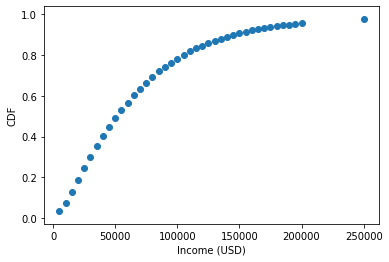

In [161]:
plt.scatter(df['income'], df['cumprop'])

plt.xlabel('Income (USD)')
plt.ylabel('CDF');

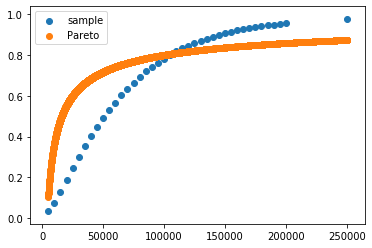

In [177]:
x_min = 4000
alpha = .5

x = np.linspace(5000, 250000, 10000)
pareto = 1 - (x_min / x)**alpha

plt.scatter(df['income'], df['cumprop'])
plt.scatter(x, pareto)
plt.legend(['sample', 'Pareto'])

In [ ]:
x_min = 4000
alpha = .5

x = np.linspace(5000, 250000, 10000)
pareto = 1 - (x_min / x)**alpha

plt.scatter(df['income'], df['cumprop'])
plt.scatter(x, pareto)
plt.legend(['sample', 'Pareto'])